<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/Analyzing_data_in_the_JARVIS_Leaderboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analyzing data in JARVIS-Leaderbaord

In [1]:
import os
if not os.path.exists('jarvis_leaderboard'):
  !git clone https://github.com/usnistgov/jarvis_leaderboard.git
os.chdir('jarvis_leaderboard')
!pip install -e .

Cloning into 'jarvis_leaderboard'...
remote: Enumerating objects: 23789, done.
remote: Counting objects: 100% (4699/4699), done.
remote: Compressing objects: 100% (658/658), done.
remote: Total 23789 (delta 2533), reused 4428 (delta 2377), pack-reused 19090
Receiving objects: 100% (23789/23789), 144.16 MiB | 15.40 MiB/s, done.
Resolving deltas: 100% (12227/12227), done.
Updating files: 100% (1911/1911), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/jarvis_leaderboard
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 973.8/973.8 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 85.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.3/515.3 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 87.5 MB/s eta 0:00:00
  

Example of getting data for a particular benchmark

In [2]:
from jarvis_leaderboard.rebuild import get_metric_value,get_results

In [3]:
names,vals=get_results(bench_name='AI-SinglePropertyPrediction-formation_energy_peratom-dft_3d-test-mae.csv.zip')

In [4]:
names

array(['alignn_model', 'kgcnn_schnet', 'cgcnn_model', 'matminer_lgbm',
       'kgcnn_cgcnn', 'cfid', 'cfid_chem'], dtype='<U13')

In [5]:
vals

array([0.033, 0.061, 0.063, 0.102, 0.119, 0.142, 0.223])

Example mean absolute errors for AI formation
energy and ES silicon bandgap benchmarks

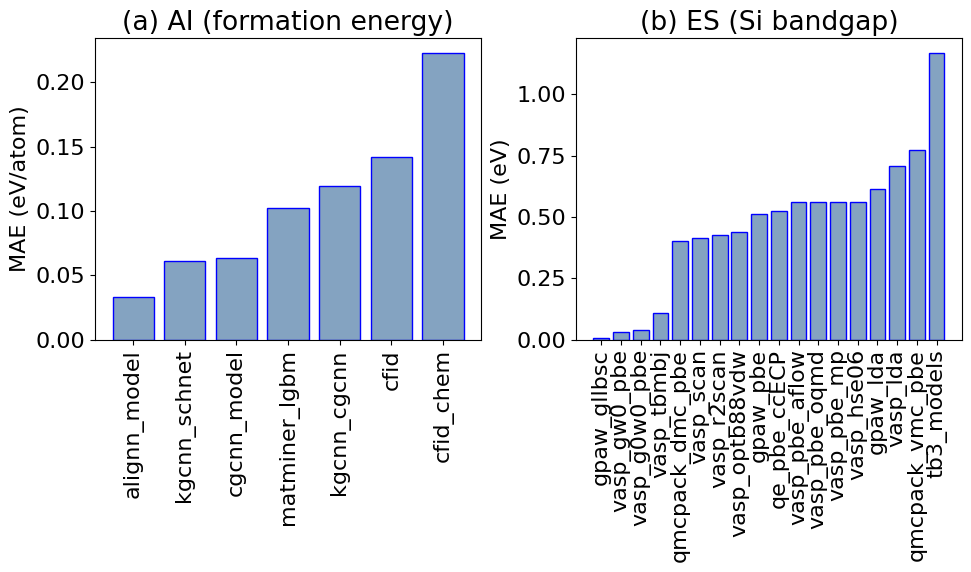

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from jarvis_leaderboard.rebuild import get_metric_value,get_results
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.colors as mcolors
colors = list(mcolors.TABLEAU_COLORS.values())
colors=np.repeat([0.1, 0.1, 0.1, 0.1],10)

the_grid = GridSpec(1, 2)
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(10,6))

plt.subplot(the_grid[0, 0])
names,vals=get_results(bench_name='AI-SinglePropertyPrediction-formation_energy_peratom-dft_3d-test-mae.csv.zip')
plt.bar(np.arange(len(vals)),vals,color=(0.2, 0.4, 0.6, 0.6),edgecolor='blue')
plt.xticks(np.arange(len(vals)),names,rotation=90)
plt.ylabel('MAE (eV/atom)')
plt.title('(a) AI (formation energy)')

plt.subplot(the_grid[0, 1])
names,vals=get_results(bench_name='ES-SinglePropertyPrediction-bandgap_JVASP_1002_Si-dft_3d-test-mae.csv.zip')
#plt.bar(np.arange(len(vals)),vals,color=colors[:len(vals)], edgecolor='blue')
plt.bar(np.arange(len(vals)),vals,color=(0.2, 0.4, 0.6, 0.6), edgecolor='blue')
plt.xticks(np.arange(len(vals)),names,rotation=90)
plt.ylabel('MAE (eV)')
plt.title('(b) ES (Si bandgap)')

plt.tight_layout()
plt.show()

In [7]:
!pwd

/content/jarvis_leaderboard


Example results for AI, ES, QC and EXP results. a) formation-energy-peratom model using AI, b) bulk modulus predictions using ES methods, c) electronic bandstructure of Al using QV methods with different quantum circuits, d) CO2 capture for zeolite at several labs in round-robin fashion.

In [8]:
import glob
ai_form_en={}
es_kv={}
qc_eig={}
exp_co2={}
for i in glob.glob("jarvis_leaderboard/contributions/*/*.csv.zip"):

    bench_name = i.split("/")[-2]
    if i.split('/')[-1]=='AI-SinglePropertyPrediction-formation_energy_peratom-dft_3d-test-mae.csv.zip':
        res = get_metric_value(csv_path=i)
        ai_form_en[bench_name]=res['df']
  
    if i.split('/')[-1]=='ES-SinglePropertyPrediction-bulk_modulus-dft_3d-test-mae.csv.zip':
    #if i.split('/')[-1]=='ES-SinglePropertyPrediction-bandgap-dft_3d-test-mae.csv.zip':
        res = get_metric_value(csv_path=i)
        es_kv[bench_name]=res['df']
    if i.split('/')[-1]=='QC-EigenSolver-electron_bands_JVASP_816_Al_WTBH-dft_3d-test-multimae.csv.zip':
        res = get_metric_value(csv_path=i)
        qc_eig[bench_name]=res['df']
    if i.split('/')[-1]=='EXP-Spectra-co2_RM_8852-nist_isodb-test-multimae.csv.zip':
        res = get_metric_value(csv_path=i)
        exp_co2[bench_name]=res['df'] 

0 C3 #1f77b4
1 C6 #ff7f0e
2 C2 #2ca02c
3 C1 #d62728
4 C4 #9467bd
5 C5 #8c564b


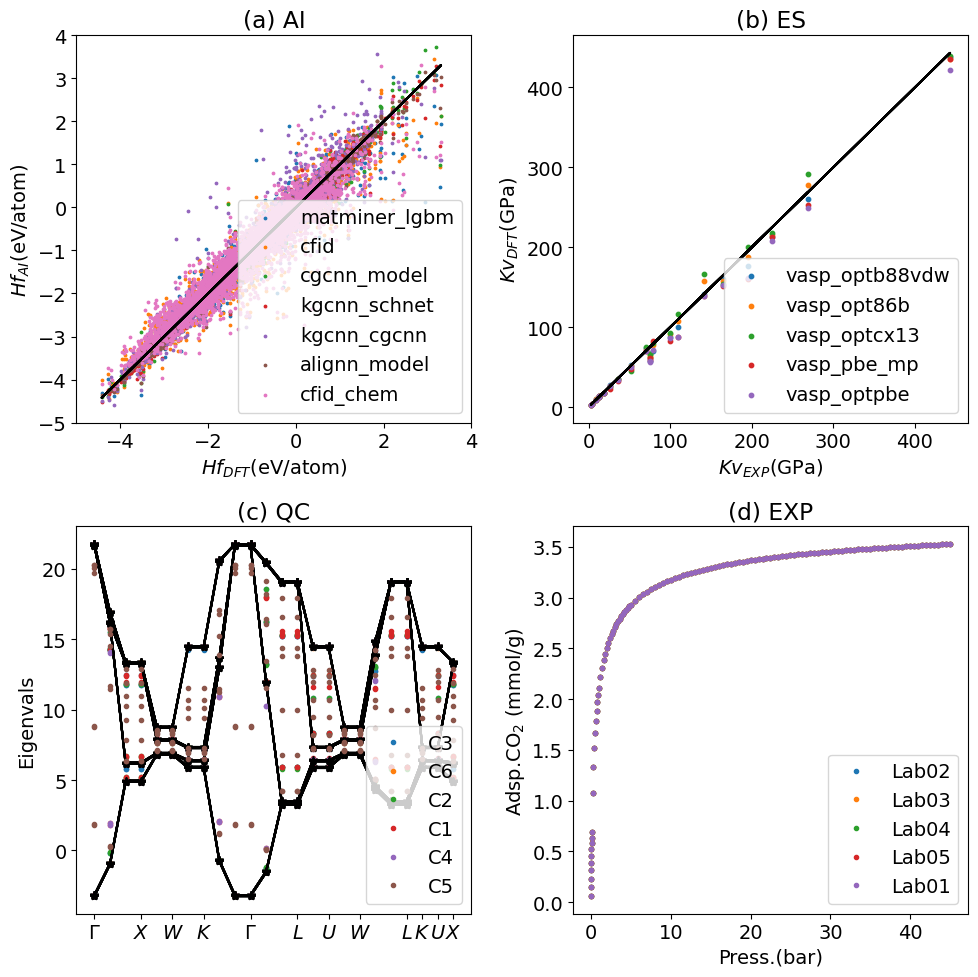

In [9]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

the_grid = GridSpec(2, 2)
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10,10))

plt.subplot(the_grid[0, 0])
plt.xlabel('$Hf_{DFT}$(eV/atom)')
plt.ylabel('$Hf_{AI}$(eV/atom)')
plt.title('(a) AI')
for i,j in ai_form_en.items():
    plt.scatter(j['actual'],j['prediction'],s=3,label=i)
    plt.plot(j['actual'],j['actual'],c='black')
plt.legend()
plt.xlim([-5,4])
plt.ylim([-5,4])

plt.subplot(the_grid[0, 1])
plt.title('(b) ES')
plt.ylabel('$Kv_{DFT}$(GPa)')
plt.xlabel('$Kv_{EXP}$(GPa)')
for i,j in es_kv.items():
    plt.scatter(j['actual'],j['prediction'],s=10,label=i)
    plt.plot(j['actual'],j['actual'],c='black')
plt.legend()



plt.subplot(the_grid[1, 0])

count=0
colors = list(mcolors.TABLEAU_COLORS.values())
for i,j in qc_eig.items():
    actual=np.array(j['actual'].values[0].split(';'),dtype='float').reshape(24,8)
    pred=np.array(j['prediction'].values[0].split(';'),dtype='float').reshape(24,8)
   
    for ii,jj in enumerate(actual.T):
#         if ii==0:
#             plt.plot(jj,'-*',c='g',label='NP')
        plt.plot(jj,'-*',c='black')
        
    for ii,jj in enumerate(pred.T):
#         if ii==0:
#             plt.plot(jj,'*',c='b',label=i.split('qiskit_vqd_SU2_')[1])
        if ii==0:
            lbl = i.split('qiskit_vqd_SU2_')[1].replace('c','C')
            
            
            plt.plot(jj,'.',label=lbl,c=colors[count])
            print(count,lbl,colors[count])
            
        else:
            plt.plot(jj,'.',c=colors[count])   
    count+=1
    
kp=[0, 3, 5, 7, 10, 13, 15, 17, 20, 21, 22, 23]
lbls=['$\\Gamma$', '$X$', '$W$', '$K$', '$\\Gamma$', '$L$', '$U$', '$W$', '$L$', '$K$', '$U$', '$X$']
plt.xticks(kp,lbls)
plt.legend(loc='lower right')
plt.title('(c) QC')
plt.ylabel('Eigenvals')



plt.subplot(the_grid[1, 1])

press=[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 4.6, 4.8, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10, 10.5, 11, 11.5, 12, 12.5, 13, 13.5, 14, 14.5, 15, 15.5, 16, 16.5, 17, 17.5, 18, 18.5, 19, 19.5, 20, 20.5, 21, 21.5, 22, 22.5, 23, 23.5, 24, 24.5, 25, 25.5, 26, 26.5, 27, 27.5, 28, 28.5, 29, 29.5, 30, 30.5, 31, 31.5, 32, 32.5, 33, 33.5, 34, 34.5, 35, 35.5, 36, 36.5, 37, 37.5, 38, 38.5, 39, 39.5, 40, 40.5, 41, 41.5, 42, 42.5, 43, 43.5, 44, 44.5, 45]

for i,j in exp_co2.items():
    actual=np.array(j['actual'].values[0].split(';'),dtype='float')
    pred=np.array(j['prediction'].values[0].split(';'),dtype='float')
    #press=np.log(press)
#     pred=np.exp(pred)
#     actual=np.exp(actual)
    plt.plot(press,actual,'.',label=i.split('x.')[-1])
plt.legend()
plt.title('(d) EXP')
plt.xlabel('Press.(bar)')
plt.ylabel('Adsp.CO$_2$ (mmol/g)')
    
    
plt.tight_layout()
plt.show()
# plt.savefig('results_example.pdf')
# plt.close()

Distribution of data in each dataset. a) all entries in leaderboard, b) entries with unique identifiers. Note one identifier can have multiple properties.

In [10]:
import glob
import zipfile
import numpy as np
import json,os
from jarvis.db.jsonutils import loadjson
from collections import defaultdict
import pandas as pd
from sklearn.metrics import mean_absolute_error, accuracy_score


id_info = defaultdict()
for csv_path in glob.glob("jarvis_leaderboard/contributions/*/*.csv.zip"):

    fname = csv_path.split("/")[-1].split(".csv.zip")[0]
    contribution = csv_path.split("/")[-2]
    temp = fname.split("-")
    category = temp[0]
    subcat = temp[1]
    prop = temp[2]
    dataset = temp[3]
    data_split = temp[4]
    metric = temp[-1]
    
    
    
    data_split='test'
    json_name = dataset + "_" + prop + ".json"
    json_path = 'jarvis_leaderboard/benchmarks/'+category+'/'+subcat+'/'+json_name+'.zip'
    z = zipfile.ZipFile(json_path)
    json_data = json.loads(z.read(json_name))
    if dataset not in id_info:
        id_info[dataset]=[]

        
    if "val" in json_data:  # sometimes just train-test
        data_size = (
            len(json_data["train"])
            + len(json_data["val"])
            + len(json_data["test"])
        )
        for m in list(json_data["train"].keys()):
          
                id_info[dataset].append(m)
        for m in list(json_data["val"].keys()):
           
                id_info[dataset].append(m)
        for m in list(json_data["test"].keys()):
            
                id_info[dataset].append(m)
    else:
        data_size = len(json_data["train"]) + len(json_data["test"])
        for m in list(json_data["train"].keys()):
            
                id_info[dataset].append(m)

        for m in list(json_data["test"].keys()):
           
                id_info[dataset].append(m)

dft_3d 4297561 55713
nist_isodb 5 1
ssub 5178 1726
dft_2d 2 2
lj_2d_liquid 2 1
alignn_ff_db 2149777 307111
mlearn_Mo 1736 217
mlearn_Cu 2344 293
mlearn_Ni 2940 294
mlearn_Li 2160 270
mlearn_Si 1912 239
mlearn_Ge 2024 253
arXiv 908946 87148
pubchem 400500 44500
stem_2d_image 18300 9150
hmof 963557 137651
qm9_std_jctc 1569948 130829
megnet 138478 69239
qe_tb 2488722 829574
qmof 20424 20424
edos_pdos 14243 14243
snumat 10386 10386


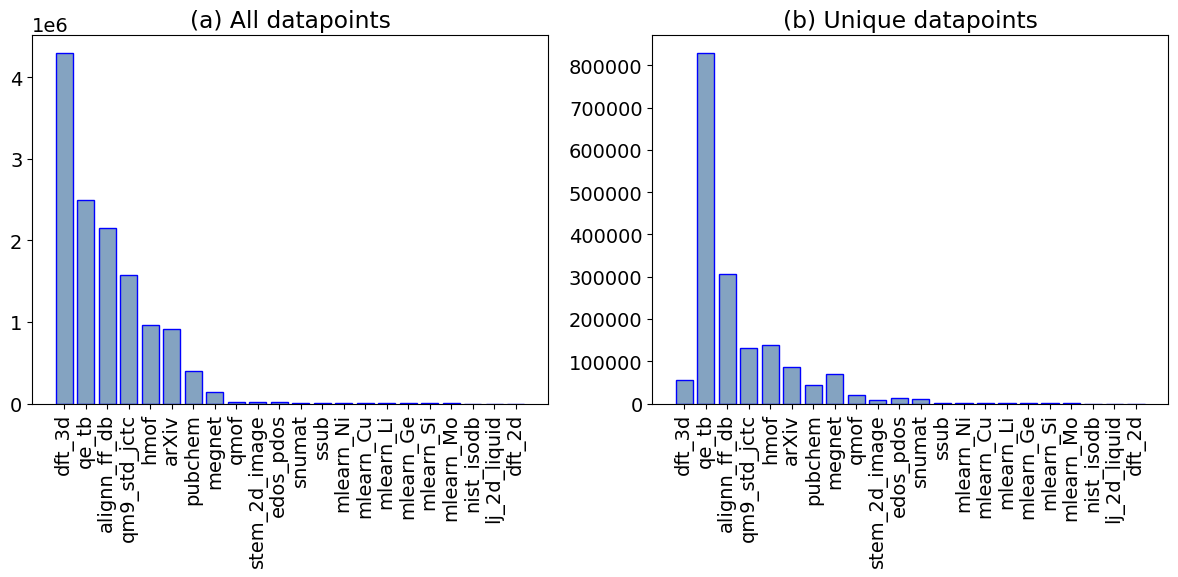

In [11]:
import numpy as np
names=[]
all_ids=[]
unique_ids=[]
for i,j in id_info.items():
    print (i,len(j),len(set(j)))
    names.append(i)
    all_ids.append(len(j))
    unique_ids.append(len(set(j)))
  

order = np.argsort(all_ids)[::-1]
names=np.array(names)[order]
all_ids=np.array(all_ids)[order]
unique_ids=np.array(unique_ids)[order]
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

the_grid = GridSpec(1, 2)
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(12,6))

plt.subplot(the_grid[0, 0])
plt.title('(a) All datapoints')

#plt.bar(names,all_ids,facecolor = '#2ab0ff', edgecolor='b',alpha=0.7)
plt.bar(names,all_ids,color=(0.2, 0.4, 0.6, 0.6), edgecolor='blue')
plt.xticks(rotation=90)
plt.subplot(the_grid[0, 1])
plt.title('(b) Unique datapoints')
#plt.bar(names,unique_ids,facecolor = '#2ab0ff', edgecolor='b',alpha=0.7)
plt.bar(names,unique_ids,color=(0.2, 0.4, 0.6, 0.6), edgecolor='blue')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()
# plt.savefig('data_dist.pdf')
# plt.close()

Mean absolute deviation to mean absolute ratio, MAD and MAE for a) AI and b) electronic structure methods. MAD:MAE serves as uniform criteria for comparing performances of models.

42

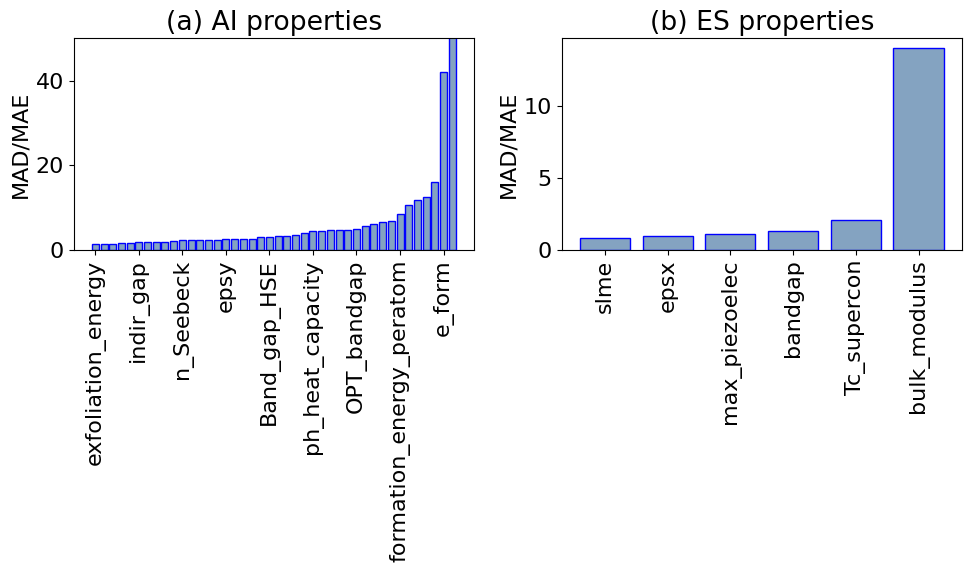

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.colors as mcolors

the_grid = GridSpec(1, 2)
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(10,6))

plt.subplot(the_grid[0, 0])
plt.title('(a) AI properties')
plt.ylabel('MAD/MAE')

mad_maes=[]
mad_maes_names=[]
ai_single_prop = []
for i in glob.glob("jarvis_leaderboard/contributions/*/AI-SinglePropertyPrediction*.csv.zip"):
    nm=i.split('/')[-1].split('-')[2].replace('optb88vdw','OPT')
    if 'qm9' not in i and nm not in mad_maes_names: #requires scaling factor
        tmp= i.split('/')[-1]     
        res=get_metric_value(i)
        random_guessing_performance=res['random_guessing_performance']
        mae=res['res']
        mad_mae = random_guessing_performance/mae
        mad_maes.append(mad_mae)
        mad_maes_names.append(nm)
        #break
        if tmp not in ai_single_prop:
            ai_single_prop.append(tmp)
mad_maes=np.array(mad_maes)
mad_maes_names=np.array(mad_maes_names)
order=np.argsort(mad_maes)
mad_maes=mad_maes[order]
mad_maes_names=mad_maes_names[order]

back=mad_maes_names
plt.subplot(the_grid[0, 0])
plt.bar(np.arange(len(mad_maes)),mad_maes,color=(0.2, 0.4, 0.6, 0.6), edgecolor='blue')
plt.ylim([0,50])
plt.xticks(np.arange(len(mad_maes)),mad_maes_names,rotation=90)
plt.locator_params(axis='x', nbins=10)




plt.subplot(the_grid[0, 1])
plt.title('(b) ES properties')
plt.ylabel('MAD/MAE')
mad_maes=[]
mad_maes_names=[]
es_single_prop = []
for i in glob.glob("jarvis_leaderboard/contributions/*/ES-SinglePropertyPrediction*.csv.zip"):
    nm=i.split('/')[-1].split('-')[2]
    if 'JVASP' not in i and nm not in mad_maes_names: #single data
        tmp= i.split('/')[-1]     
        res=get_metric_value(i)
        random_guessing_performance=res['random_guessing_performance']
        mae=res['res']
        mad_mae = random_guessing_performance/mae
        mad_maes.append(mad_mae)
        mad_maes_names.append(nm)
        #break
        if tmp not in es_single_prop:
            es_single_prop.append(tmp)
mad_maes=np.array(mad_maes)
mad_maes_names=np.array(mad_maes_names)
order=np.argsort(mad_maes)
mad_maes=mad_maes[order]
mad_maes_names=mad_maes_names[order]

len(es_single_prop)




plt.bar(np.arange(len(mad_maes)),mad_maes,color=(0.2, 0.4, 0.6, 0.6), edgecolor='blue')
plt.xticks(np.arange(len(mad_maes)),mad_maes_names,rotation=90)
plt.locator_params(axis='x', nbins=8)

#plt.ylim([0,100])
plt.tight_layout()
len(ai_single_prop)